In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

In [3]:
end_date = datetime.now()

# df = yf.download('TSLA',end=end_date)

df = pd.read_csv(filepath_or_buffer=r'TESLA.csv')

In [4]:
df = df.set_index(df['Date'],drop=True)
df.drop(columns=['Date','Unnamed: 0'],inplace=True)

KeyError: 'Date'

In [ ]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2010-06-29,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...,...
2023-07-26,3290,2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200
2023-07-27,3291,2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300
2023-07-28,3292,2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200
2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000


In [ ]:
# df.to_csv('TESLA.csv')
one_year_df = df[2930:] # first I only want to work in one years data.
df = df[1470:]

<AxesSubplot: xlabel='Date'>

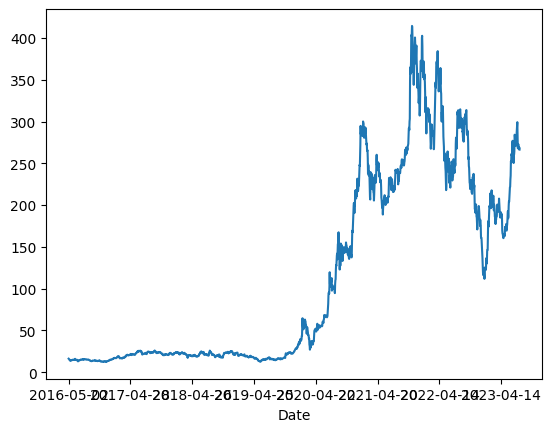

In [ ]:
df['High'].plot()

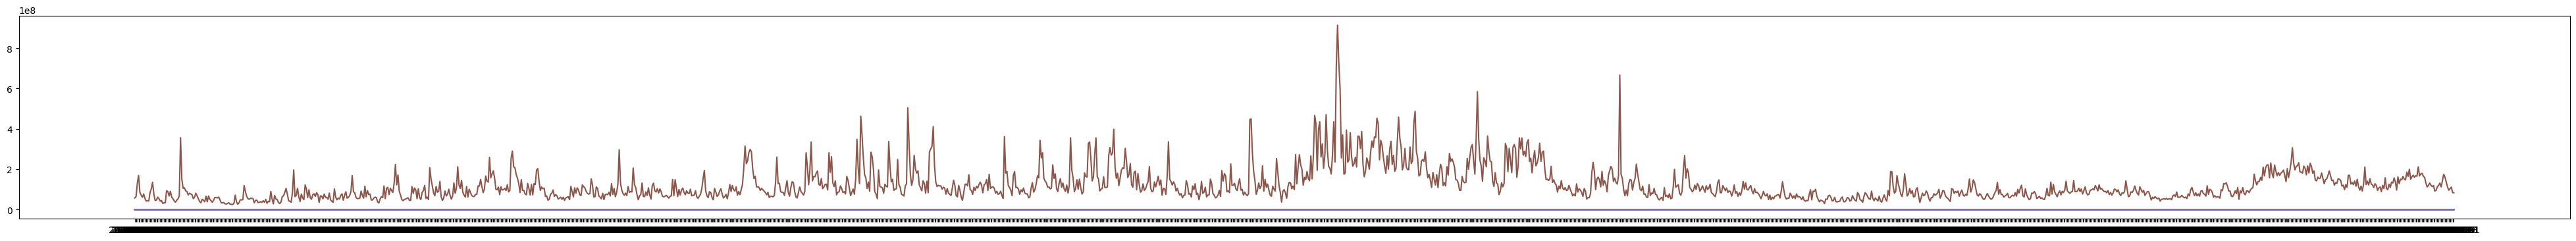

In [ ]:
plt.figure(figsize=(50,4))
plt.plot(df)
plt.show()

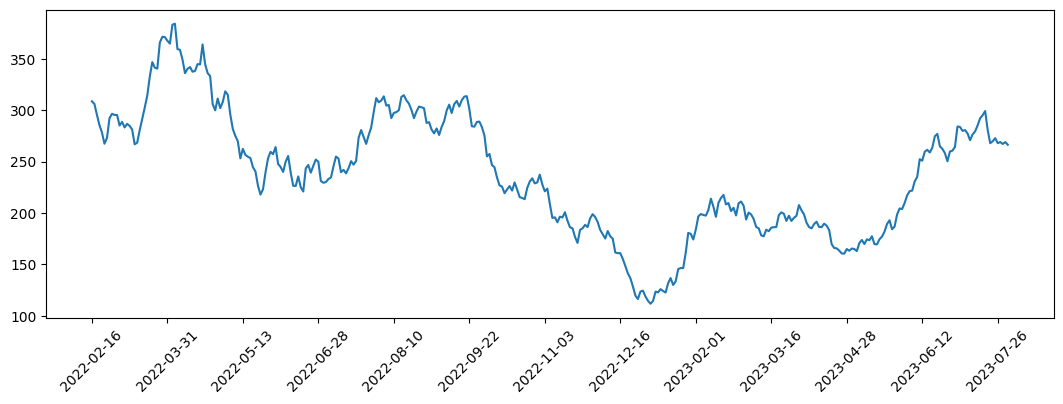

In [ ]:
plt.figure(figsize=(13,4))
plt.plot(one_year_df['High'])
plt.xticks(rotation = 45)

step = max(0,len(one_year_df)//15)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, nbins=15))
plt.show()

In [ ]:
stock_open=df.loc['2022-06-1':'2023-08-01']['Open']
index = df.loc['2022-06-1':'2023-08-01'].index

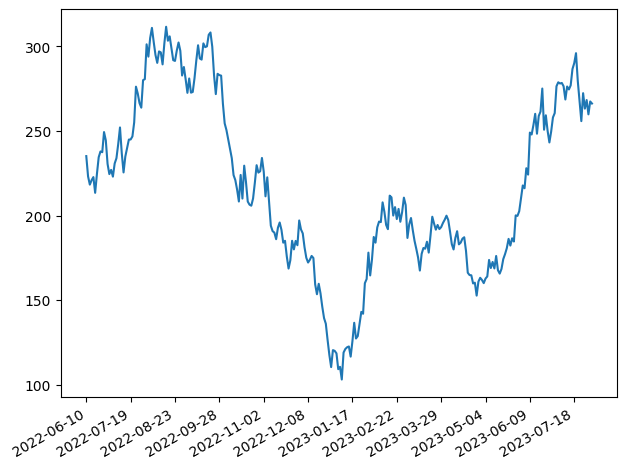

In [ ]:
figure , axis = plt.subplots()
axis.plot(index,stock_open)
figure.autofmt_xdate()
plt.tight_layout()
step = max(0,len(one_year_df)//15)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, nbins=15))
plt.show()

## rolling

In [8]:
df['High'].rolling(window=10).mean()

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3290    281.125003
3291    280.093002
3292    278.288004
3293    275.973001
3294    273.094000
Name: High, Length: 3295, dtype: float64